Problem Statement

You are willing to sell your house. You are not sure about the price of your house and want to estimate its price. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your house for selling it.




In [ ]:
# Import the required modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Check if there are any NULL values.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# Check categorical attributes
numeric_df = df.select_dtypes(include=["object"])
numeric_df.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


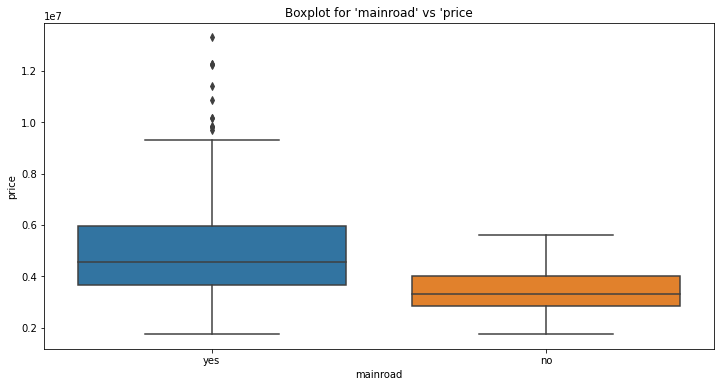

In [ ]:
# Boxplot for 'mainroad' vs 'price'
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title("Boxplot for 'mainroad' vs 'price")
sns.boxplot(x="mainroad",y="price",data=df)
plt.show()

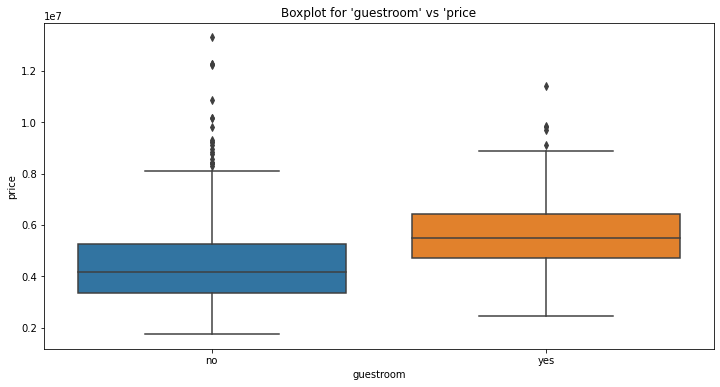

In [ ]:
# Boxplot for 'guestroom' vs 'price'
plt.figure(figsize=(12,6))
plt.title("Boxplot for 'guestroom' vs 'price")
sns.boxplot(x="guestroom",y="price",data=df)
plt.show()

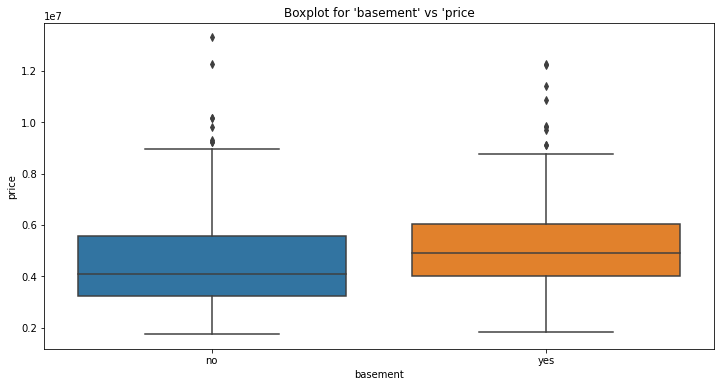

In [ ]:
# Boxplot for 'basement' vs 'price'
plt.figure(figsize=(12,6))
plt.title("Boxplot for 'basement' vs 'price")
sns.boxplot(x="basement",y="price",data=df)
plt.show()

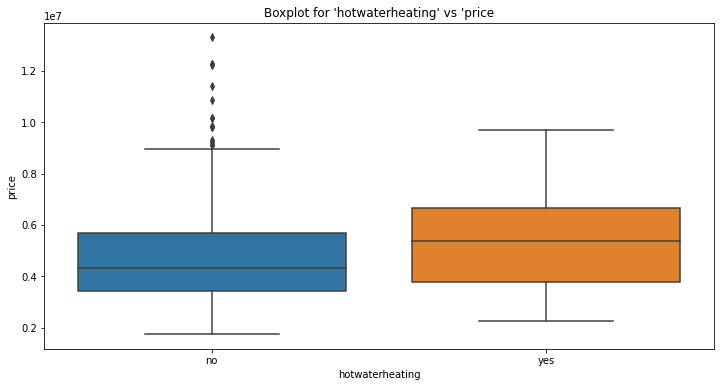

In [ ]:
# Boxplot for 'hotwaterheating' vs 'price'
plt.figure(figsize=(12,6))
plt.title("Boxplot for 'hotwaterheating' vs 'price")
sns.boxplot(x="hotwaterheating",y="price",data=df)
plt.show()

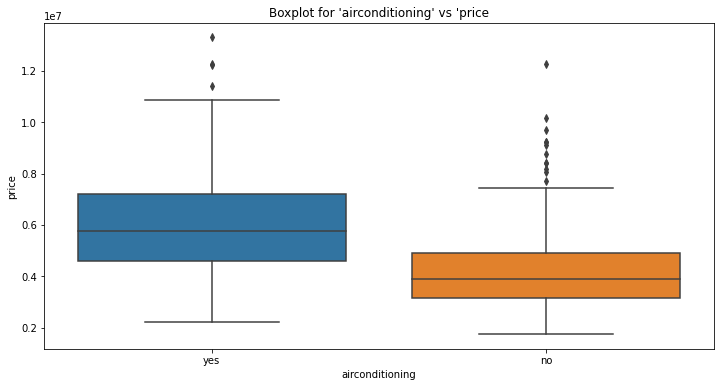

In [ ]:
# Boxplot for 'airconditioning' vs 'price'
plt.figure(figsize=(12,6))
plt.title("Boxplot for 'airconditioning' vs 'price")
sns.boxplot(x="airconditioning",y="price",data=df)
plt.show()

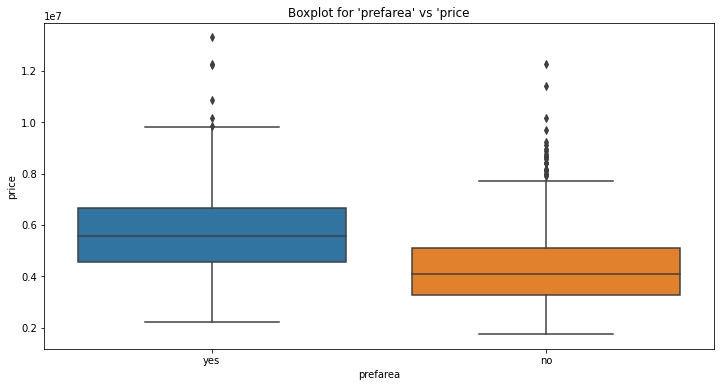

In [ ]:
# Boxplot for 'prefarea' vs 'price'
plt.figure(figsize=(12,6))
plt.title("Boxplot for 'prefarea' vs 'price")
sns.boxplot(x="prefarea",y="price",data=df)
plt.show()



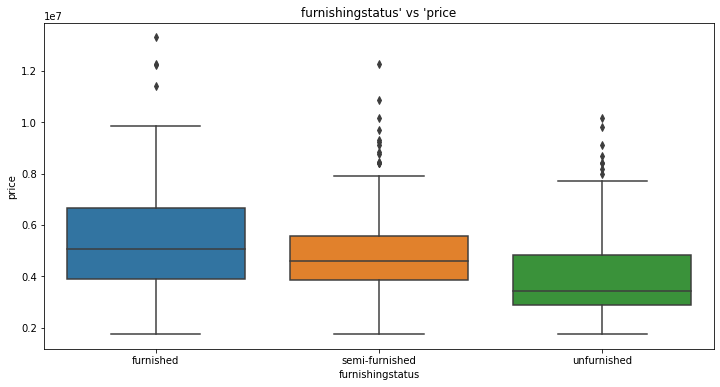

In [ ]:
# Boxplot for 'furnishingstatus' vs 'price'
plt.figure(figsize=(12,6))
plt.title("furnishingstatus' vs 'price")
sns.boxplot(x="furnishingstatus",y="price",data=df)
plt.show()

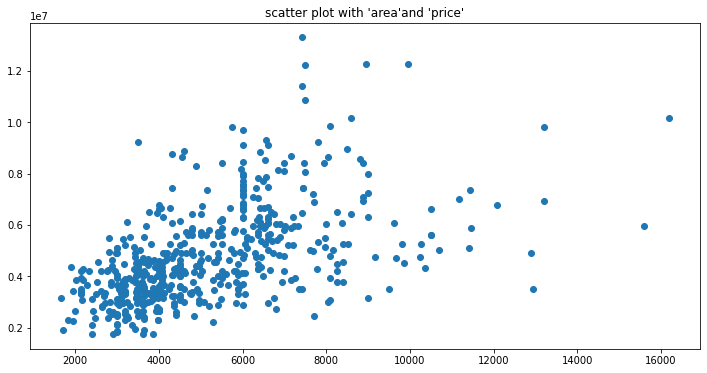

In [ ]:
# Create scatter plot with 'area' on X-axis and 'price' on Y-axis
plt.figure(figsize=(12,6))
plt.title("scatter plot with 'area'and 'price'")
plt.scatter(df["area"],df["price"])
plt.show()


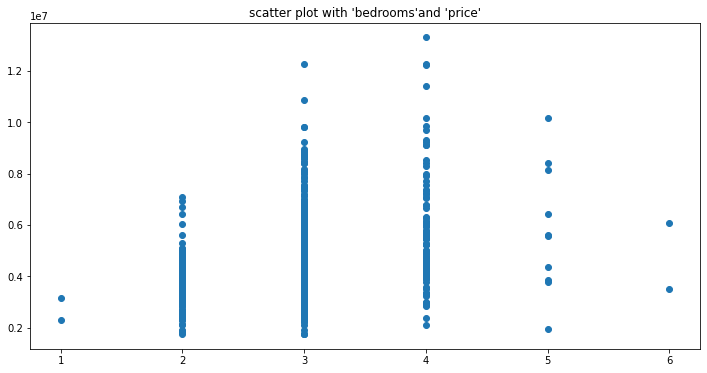

In [ ]:
# Create scatter plot with 'bedrooms' on X-axis and 'price' on Y-axis
plt.figure(figsize=(12,6))
plt.title("scatter plot with 'bedrooms'and 'price'")
plt.scatter(df["bedrooms"],df["price"])
plt.show()

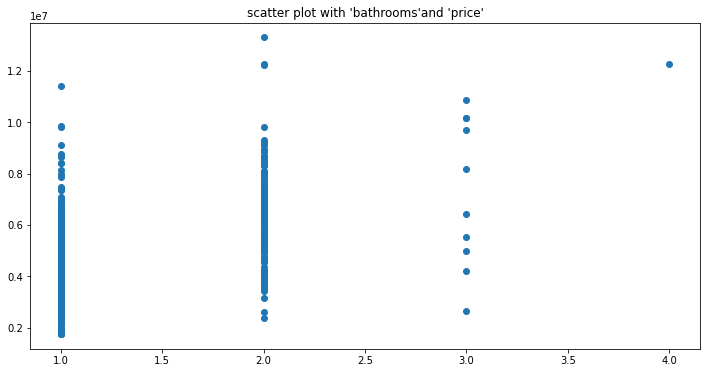

In [ ]:
# Create scatter plot with 'bathrooms' on X-axis and 'price' on Y-axis
plt.figure(figsize=(12,6))
plt.title("scatter plot with 'bathrooms'and 'price'")
plt.scatter(df["bathrooms"],df["price"])
plt.show()

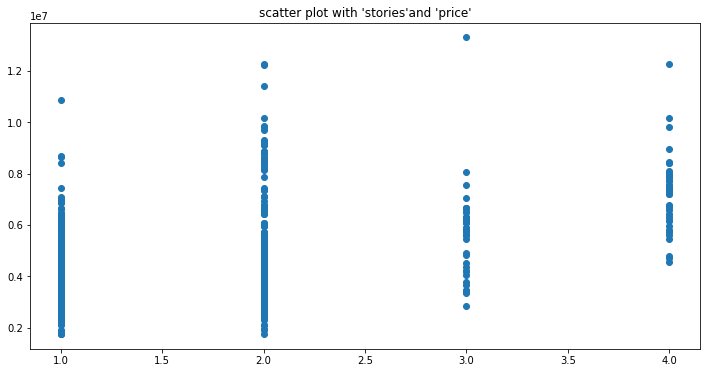

In [ ]:
# Create scatter plot with 'stories' on X-axis and 'price' on Y-axis
plt.figure(figsize=(12,6))
plt.title("scatter plot with 'stories'and 'price'")
plt.scatter(df["stories"],df["price"])
plt.show()

0    6.331085e-12
1    7.034211e-11
2    7.034211e-11
3    7.580745e-11
4    3.846671e-10
5    1.067204e-09
6    3.367876e-09
7    3.367876e-09
8    5.127867e-09
9    5.676210e-09
Name: price, dtype: float64


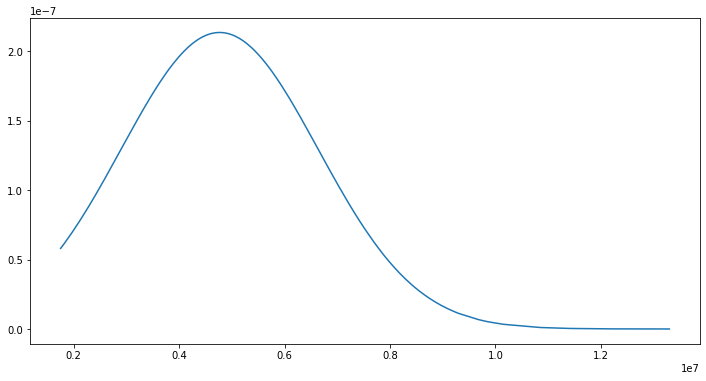

In [ ]:
# Create a normal distribution curve for the 'price'.
def prob_den_func(arr,mean,std):
  cof_eff= 1 / (std * np.sqrt(2 * np.pi))
  pow_ef=np.exp(-(arr - mean) ** 2 / (2 * std ** 2))
 
  prob_denc=cof_eff*pow_ef
  return prob_denc
prob_array=prob_den_func(df['price'],np.mean(df['price']),np.std(df['price']))
print(prob_array[:10])  

# Create a probablity density function for plotting the normal distribution


# Plot the normal distribution curve using plt.scatter() 
plt.figure(figsize=(12,6))
plt.plot(df['price'],prob_array)
plt.show()

In [ ]:
# Replace yes with 1 and no with 0 for all the values in features 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' using map() function.
words_dict = {"yes": 1, "no":0}
def num_map(series):
    return series.map(words_dict)
df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]=df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].apply(num_map,axis=1)   

In [ ]:
# Print dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Perform one hot encoding for furnishingstatus feature.
dummy = pd.get_dummies(df["furnishingstatus"],dtype=int,drop_first=False)
df=pd.concat([df,dummy],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [ ]:
# Drop 'furnishingstatus' feature
df=df.drop(columns="furnishingstatus")

In [ ]:
# Print dataframe 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


4. Model Building and Evaluation 

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(df,test_size=0.4,random_state=42)


In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
features=list(df.columns)
features.remove("price")
X_train=train_df[features]
X_test=test_df[features]
y_train=train_df["price"]
y_test=test_df["price"]
X_train.shape

(327, 14)

In [ ]:
# Build a linear regression model using all the features to predict prices.
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const              176949.758861
area                  250.417281
bedrooms           102581.211492
bathrooms          899354.834345
stories            384354.682068
mainroad           383444.453667
guestroom          346059.536764
basement           419534.833346
hotwaterheating    737594.611729
airconditioning    653976.113075
parking            254916.721961
prefarea           454983.454541
furnished          270904.493983
semi-furnished     116684.364007
unfurnished       -210639.099130
dtype: float64

In [ ]:
# Print the summary of the linear regression report.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     46.60
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           3.00e-65
Time:                        05:33:36   Log-Likelihood:                -4965.2
No. Observations:                 327   AIC:                             9958.
Df Residuals:                     313   BIC:                         1.001e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.769e+05   2.17e+05     

In [ ]:
# Calculate N and p values
num_rows = X_train.shape[0] 
print("n=",num_rows) 
num_predictors = X_train.shape[1] 
print("p=",num_predictors)

n= 327
p= 14


In [ ]:
# Calculate the adjusted R-square value.
r2_score = lr.rsquared # R-squared (or coefficient of determination) value 
print("value of r2 :",r2_score)
adj_r2_score = 1 - ((1 - r2_score) * (num_rows - 1))/(num_rows - num_predictors - 1) # Adjusted R-squared calculation
print("value of adjusted R-squared:",adj_r2_score)

value of r2 : 0.6593597229768662
value of adjusted R-squared: 0.6440745823412127


5. Model Evaluation

Build a multiple linear regression model using sklearn module. Also, evaluate the model by calculating  R2 , MSE, RMSE, and MAE values.

In [ ]:
# Build multiple linear regression model using all the features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LinearRegression



lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print("Constant ",lin_reg.intercept_)
for item in list(zip(X_train.columns.values,lin_reg.coef_)):
  print(f"{item[0]}".ljust(15," "),f"{item[1]:.6f}")




Constant  235933.01181404106
area            250.417281
bedrooms        102581.211492
bathrooms       899354.834345
stories         384354.682068
mainroad        383444.453667
guestroom       346059.536764
basement        419534.833346
hotwaterheating 737594.611729
airconditioning 653976.113075
parking         254916.721961
prefarea        454983.454541
furnished       211921.241029
semi-furnished  57701.111054
unfurnished     -269622.352083


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_train_pred=lin_reg.predict(X_train)
y_test_pred=lin_reg.predict(X_test)
print(f"Train set\n{'-'*50}")
print(f"The R_Square:{r2_score(y_train,y_train_pred)}")
print(f"The Mean Square Error:{mean_squared_error(y_train,y_train_pred)}")
print(f"The Mean Abolute Error:{mean_absolute_error(y_train,y_train_pred)}")
print(f"The Root Mean Square error:{np.sqrt(mean_squared_error(y_train,y_train_pred))}")
print()
print(f"Test set\n{'-'*50}")
print(f"The R_Square:{r2_score(y_test,y_test_pred)}")
print(f"The Mean Square Error:{mean_squared_error(y_test,y_test_pred)}")
print(f"The Mean Abolute Error:{mean_absolute_error(y_test,y_test_pred)}")
print(f"The Root Mean Square error:{np.sqrt(mean_squared_error(y_test,y_test_pred))}")

Train set
--------------------------------------------------
The R_Square:0.6593597229768662
The Mean Square Error:904270696211.5579
The Mean Abolute Error:685396.5088189318
The Root Mean Square error:950931.4887054471

Test set
--------------------------------------------------
The R_Square:0.6754968085161095
The Mean Square Error:1506230725917.4546
The Mean Abolute Error:902975.6419842103
The Root Mean Square error:1227285.918568878


In [ ]:
# Create a Python dictionary storing the moderately to highly correlated features with price and the corresponding correlation values.
# Keep correlation threshold to be 0.2
major_features={}
for i in features:
  p_coef=np.corrcoef(df['price'],df[i])[0,1]
  if (p_coef>=0.2) or (p_coef<=-0.2):
    major_features[i]=p_coef
print(len(major_features))
major_features


11


{'area': 0.5359973457780796,
 'bedrooms': 0.3664940257738689,
 'bathrooms': 0.517545339455011,
 'stories': 0.4207123661886163,
 'mainroad': 0.2968984892639764,
 'guestroom': 0.2555172899349996,
 'airconditioning': 0.4529540842560478,
 'parking': 0.3843936486357259,
 'prefarea': 0.32977704986810735,
 'furnished': 0.22935031248433113,
 'unfurnished': -0.2805873573251204}

In [ ]:
# Perform RFE and select best 7 features  
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lin_reg1=LinearRegression()
lin_ref=RFE(lin_reg1,n_features_to_select=7)
lin_ref.fit(X_train[major_features.keys()],y_train)
print(major_features.keys())
print(lin_ref.ranking_)
print(lin_ref.support_)


dict_keys(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea', 'furnished', 'unfurnished'])
[5 3 1 2 1 1 1 1 1 4 1]
[False False  True False  True  True  True  True  True False  True]


In [ ]:
# Print the 7 features selected by RFE in the previous step.
rfe_features=X_train[major_features.keys()].columns[lin_ref.support_]
rfe_features

Index(['bathrooms', 'mainroad', 'guestroom', 'airconditioning', 'parking',
       'prefarea', 'unfurnished'],
      dtype='object')

In [ ]:
# Build multiple linear regression model using all the features selected after RFE
import statsmodels.api as sm

# Split the DataFrame into the train and test sets such that test set has 33% of the values.
X=df[rfe_features]
y=df['price']

# Build linear regression model using the 'sklearn.linear_model' module.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

# Print the value of the intercept
print("intercept=",lin_reg.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.

for item in list(zip(X_train.columns.values,lin_reg.coef_)):
  print(f"{item[0]}".ljust(15," "),f"{item[1]:.6f}")

intercept= 1345359.6611008313
bathrooms       1556331.097031
mainroad        770395.800865
guestroom       661976.529100
airconditioning 1025562.077152
parking         428129.113320
prefarea        698073.892657
unfurnished     -424295.923177


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_train_pred=lin_reg.predict(X_train)
y_test_pred=lin_reg.predict(X_test)
print(f"Train set\n{'-'*50}")
print(f"The R_Square:{r2_score(y_train,y_train_pred)}")
print(f"The Mean Square Error:{mean_squared_error(y_train,y_train_pred)}")
print(f"The Mean Abolute Error:{mean_absolute_error(y_train,y_train_pred)}")
print(f"The Root Mean Square error:{np.sqrt(mean_squared_error(y_train,y_train_pred))}")
print()
print(f"Test set\n{'-'*50}")
print(f"The R_Square:{r2_score(y_test,y_test_pred)}")
print(f"The Mean Square Error:{mean_squared_error(y_test,y_test_pred)}")
print(f"The Mean Abolute Error:{mean_absolute_error(y_test,y_test_pred)}")
print(f"The Root Mean Square error:{np.sqrt(mean_squared_error(y_test,y_test_pred))}")

Train set
--------------------------------------------------
The R_Square:0.5821247499374661
The Mean Square Error:1293627387054.37
The Mean Abolute Error:832458.4044723524
The Root Mean Square error:1137377.4162758684

Test set
--------------------------------------------------
The R_Square:0.5459698779657476
The Mean Square Error:1945845160950.8125
The Mean Abolute Error:1028596.9965539131
The Root Mean Square error:1394935.540070154


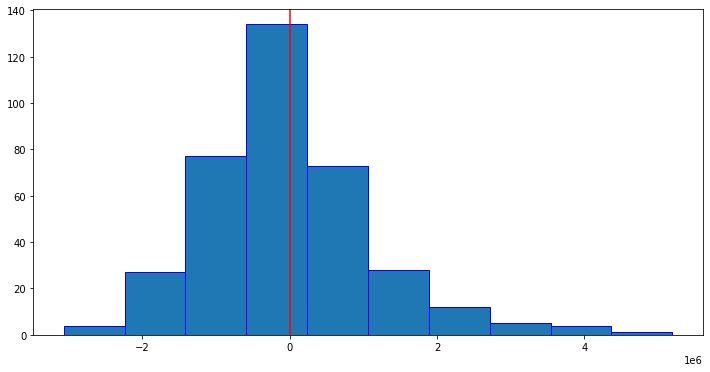

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.
error_values=y_train-y_train_pred
plt.figure(figsize=(12,6))
plt.hist(error_values,bins='sturges',edgecolor='b')
plt.axvline(x=error_values.mean(),color='r')
plt.show()

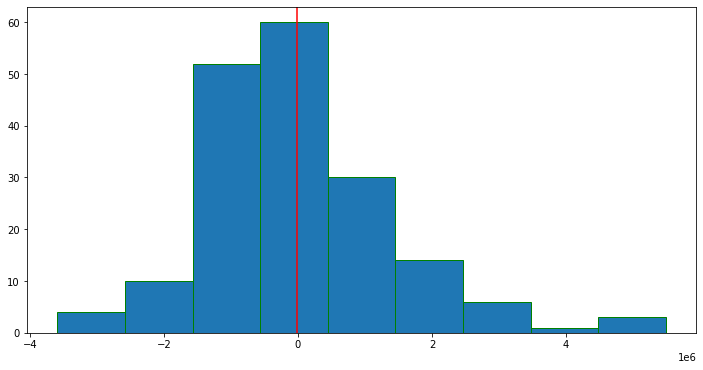

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.
error_test=y_test-y_test_pred
plt.figure(figsize=(12,6))
plt.hist(error_test,bins='sturges',edgecolor='g')
plt.axvline(x=error_test.mean(),color='r')
plt.show()

 8. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

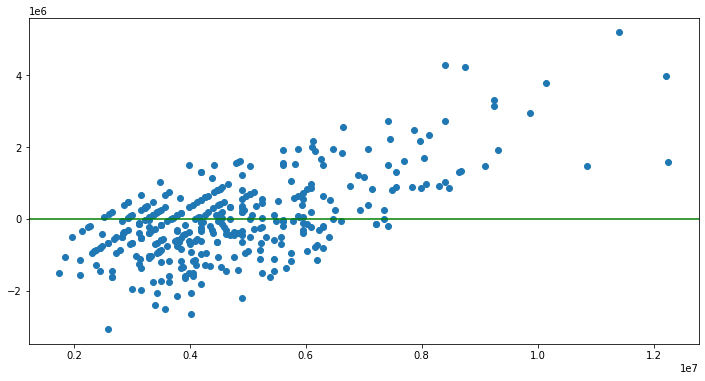

In [ ]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(12,6))
plt.scatter(y_train,error_values)
plt.axhline(y=error_values.mean(),color="g")
plt.show()